In [ ]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib as mpl

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

HUTUB_ROOT_DIR = "/mnt/c/users/evanb/The Cooper Union for the Advancement of Science and Art/ME-Project-6-HRTF-Estimation - General/HUTUB"

HRIR_DIR = os.path.join(HUTUB_ROOT_DIR, "HRIRs")

test_file = "pp1_HRIRs_measured.sofa"
test_file_path = os.path.join(HRIR_DIR, test_file)

def plot_coordinates(coords, title):
    x0 = coords
    n0 = coords
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    q = ax.quiver(x0[:, 0], x0[:, 1], x0[:, 2], n0[:, 0],
                  n0[:, 1], n0[:, 2], length=0.1)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title(title)
    #plt.savefig("{}.png".format(title), format='png')
    plt.show()

    return q

def plot_emitter_response(hrir, t, measurement, emitter):
    plt.figure(figsize=(15, 5))
    for receiver in np.arange(hrir.R):
        plt.plot(t, hrir.IR[measurement, receiver, :])
        legend.append('Receiver {0}'.format(receiver))
    plt.title('HRIR at M={0} for emitter {1}'.format(measurement, emitter))
    plt.legend(legend)
    plt.xlabel('$t$ in s')
    plt.ylabel(r'$h(t)$')
    plt.grid()

    plt.show()


In [ ]:
import os
from utils.CustomSOFA import SOFA
HUTUB_ROOT_DIR = "/mnt/c/users/evanb/The Cooper Union for the Advancement of Science and Art/ME-Project-6-HRTF-Estimation - General/HUTUB"
HRIR_DIR = os.path.join(HUTUB_ROOT_DIR, "HRIRs")
test_file = "pp1_HRIRs_measured.sofa"
test_file_path = os.path.join(HRIR_DIR, test_file)
import IPython
import pysofaconventions
import matplotlib.pyplot as plt
# import soundfile as sf
import numpy as np
from acousticslib.plots import *
from acousticslib.domain_conversions import *

def playback(audiofile_path):
    IPython.display.Audio(audiofile_path)

def read_sofa(sofa_path):
    return SOFA(pysofaconventions.SOFAFile(sofa_path,'r'))

hrir = read_sofa(test_file_path)


In [ ]:
hw4_path = "/mnt/c/users/evanb/documents/2020spring/soundspace/hw4/HW4_spect.wav"

from scipy.io import wavfile
sampling_frequency, x = wavfile.read(hw4_path)
x = x/32767
dt = 1/sampling_frequency
num_bins = 6
plot_spectrogram(x, dt, num_bins = 500, percent_overlap = 70, convert_to_dB=True)
# plot_spectrogram(x, dt, record_length = 401, percent_overlap = 25, convert_to_dB=True)


In [ ]:
from acousticslib.gxx_average import gxx_average

In [ ]:
rms_avged_gxx, linear_avged_gxx, time_avged_gxx, f_range = gxx_average(x, dt, 16)

In [ ]:
plot_gxx(f_range, time_avged_gxx)
plot_gxx(f_range, linear_avged_gxx)
plot_gxx(f_range, rms_avged_gxx)

In [ ]:
# plot Data.IR at M=5 for E=0
measurement = 5
emitter = 0
legend = []

t = np.arange(0,hrir.N)/hrir.SamplingRate

dt = 1/hrir.SamplingRate
x = hrir.IR[measurement, :, :]

bins = 15
record_lengths = range(2, 42, 4)
X, f_range = ts2ls(x, dt)
for record_length in record_lengths:
    print(record_length)
    plot_spectrogram(x[0, :], dt,record_length = record_length, percent_overlap = 0, convert_to_dB=True)

In [ ]:
plot_time_series(t, hrir.IR[measurement, :, :], title='HRIR at M={0} for emitter {1}'.format(measurement, emitter))
plot_linear_spectrum_amplitude(f_range, X)
plot_coordinates(SOFA.sph2cart(hrir.Source["Position"]), "Source positions")
plot_phase(f_range, X)

/mnt/c/Users/evanb/documents/2020fall/seniorprojects/repo/acousticslib/generate_excitation.py:60: RuntimeWarning: divide by zero encountered in true_divide
  X = np.sqrt(np.divide(1, np.abs(shifted_frequency_range)))
/mnt/c/Users/evanb/documents/2020fall/seniorprojects/repo/acousticslib/generate_excitation.py:64: ComplexWarning: Casting complex values to real discards the imaginary part
  X[:len(phase_noise)] = X[:len(phase_noise)]*np.exp(1j*phase_noise)
/mnt/c/Users/evanb/documents/2020fall/seniorprojects/repo/acousticslib/generate_excitation.py:65: ComplexWarning: Casting complex values to real discards the imaginary part
  X[ceil(pulse_length/2 + 1) - 1: pulse_length - ((pulse_length % 2) == 0)] = np.multiply(X[ ceil(pulse_length/2 + 1) - 1 : pulse_length - ((pulse_length % 2) == 0)], np.conj(np.exp(1j*np.flip(phase_noise))))
/home/bubsy/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return a

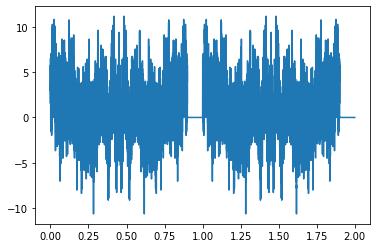

In [1]:
import acousticslib as ac
from acousticslib.plots import *
import matplotlib.pyplot as plt
T = 1
Tp = 0.9
fs = 12000
f = 2000
dt = 1/fs

x, t = ac.generate_excitation(T*fs, Tp, 2, "pink_noise", fs, sweep_freq_low = 50, sweep_freq_high = 5000)
plt.plot(t, x[0, :])


In [ ]:
t

In [ ]:
from acousticslib.hann_fades import hann_fades